<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_1_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.456827,37.375238,55.116591,36.697540,-0.191523,228.454674,228.634849,-0.180175
1,0.0,1.0,32.672697,41.622505,30.537069,37.004322,-0.124079,151.712513,151.784010,-0.071497
2,0.0,2.0,39.545619,76.871323,67.902871,82.894187,-0.020327,277.193672,277.195066,-0.001394
3,0.0,3.0,40.617635,46.098096,74.348146,99.285100,-0.178255,270.170722,270.342050,-0.171328
4,0.0,4.0,58.052254,66.595322,27.472550,85.019528,-0.009285,247.130370,247.108074,0.022295
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.197194,53.437377,55.727677,56.873800,-0.039544,245.196504,245.220405,-0.023900
29996,999.0,26.0,73.003168,63.620023,99.263270,25.229358,-0.075033,271.040786,271.097451,-0.056665
29997,999.0,27.0,87.057542,69.589202,73.883576,72.385276,0.016334,312.931930,312.921298,0.010631
29998,999.0,28.0,81.448397,50.095047,73.584268,45.599554,-0.232992,260.494275,260.713834,-0.219559


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.456827  37.375238  55.116591  36.697540 -0.191523  228.454674   
      1.0    32.672697  41.622505  30.537069  37.004322 -0.124079  151.712513   
      2.0    39.545619  76.871323  67.902871  82.894187 -0.020327  277.193672   
      3.0    40.617635  46.098096  74.348146  99.285100 -0.178255  270.170722   
      4.0    58.052254  66.595322  27.472550  85.019528 -0.009285  247.130370   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.197194  53.437377  55.727677  56.873800 -0.039544  245.196504   
      26.0   73.003168  63.620023  99.263270  25.229358 -0.075033  271.040786   
      27.0   87.057542  69.589202  73.883576  72.385276  0.016334  312.931930   
      28.0   81.448397  50.095047  73.584268  45.599554 -0.232992  260.494275   
      29.0   35.777749  83.479438  32.373640  78.964490  0.011491  240.606808   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    228.634849 -0.180175  
      1.0    151.784010 -0.071497  
      2.0    277.195066 -0.001394  
      3.0    270.342050 -0.171328  
      4.0    247.108074  0.022295  
...                 ...       ...  
999.0 25.0   245.220405 -0.023900  
      26.0   271.097451 -0.056665  
      27.0   312.921298  0.010631  
      28.0   260.713834 -0.219559  
      29.0   240.577593  0.029216  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.456827  37.375238  55.116591  36.697540 -0.191523  228.454674   
      1.0    32.672697  41.622505  30.537069  37.004322 -0.124079  151.712513   
      2.0    39.545619  76.871323  67.902871  82.894187 -0.020327  277.193672   
      3.0    40.617635  46.098096  74.348146  99.285100 -0.178255  270.170722   
      4.0    58.052254  66.595322  27.472550  85.019528 -0.009285  247.130370   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.197194  53.437377  55.727677  56.873800 -0.039544  245.196504   
      26.0   73.003168  63.620023  99.263270  25.229358 -0.075033  271.040786   
      27.0   87.057542  69.589202  73.883576  72.385276  0.016334  312.931930   
      28.0   81.448397  50.095047  73.584268  45.599554 -0.232992  260.494275   
      29.0   35.777749  83.479438  32.373640  78.964490  0.011491  240.606808   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    228.634849 -0.180175  
      1.0    151.784010 -0.071497  
      2.0    277.195066 -0.001394  
      3.0    270.342050 -0.171328  
      4.0    247.108074  0.022295  
...                 ...       ...  
999.0 25.0   245.220405 -0.023900  
      26.0   271.097451 -0.056665  
      27.0   312.921298  0.010631  
      28.0   260.713834 -0.219559  
      29.0   240.577593  0.029216  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.456827,37.375238,55.116591,36.697540,-0.191523,228.454674,228.634849,-0.180175
1,0.0,1.0,32.672697,41.622505,30.537069,37.004322,-0.124079,151.712513,151.784010,-0.071497
2,0.0,2.0,39.545619,76.871323,67.902871,82.894187,-0.020327,277.193672,277.195066,-0.001394
3,0.0,3.0,40.617635,46.098096,74.348146,99.285100,-0.178255,270.170722,270.342050,-0.171328
4,0.0,4.0,58.052254,66.595322,27.472550,85.019528,-0.009285,247.130370,247.108074,0.022295
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.197194,53.437377,55.727677,56.873800,-0.039544,245.196504,245.220405,-0.023900
29996,999.0,26.0,73.003168,63.620023,99.263270,25.229358,-0.075033,271.040786,271.097451,-0.056665
29997,999.0,27.0,87.057542,69.589202,73.883576,72.385276,0.016334,312.931930,312.921298,0.010631
29998,999.0,28.0,81.448397,50.095047,73.584268,45.599554,-0.232992,260.494275,260.713834,-0.219559


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.456827  37.375238  55.116591  36.697540 -0.191523  228.454674   
      1.0    32.672697  41.622505  30.537069  37.004322 -0.124079  151.712513   
      2.0    39.545619  76.871323  67.902871  82.894187 -0.020327  277.193672   
      3.0    40.617635  46.098096  74.348146  99.285100 -0.178255  270.170722   
      4.0    58.052254  66.595322  27.472550  85.019528 -0.009285  247.130370   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.197194  53.437377  55.727677  56.873800 -0.039544  245.196504   
      26.0   73.003168  63.620023  99.263270  25.229358 -0.075033  271.040786   
      27.0   87.057542  69.589202  73.883576  72.385276  0.016334  312.931930   
      28.0   81.448397  50.095047  73.584268  45.599554 -0.232992  260.494275   
      29.0   35.777749  83.479438  32.373640  78.964490  0.011491  240.606808   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    228.634849 -0.180175  
      1.0    151.784010 -0.071497  
      2.0    277.195066 -0.001394  
      3.0    270.342050 -0.171328  
      4.0    247.108074  0.022295  
...                 ...       ...  
999.0 25.0   245.220405 -0.023900  
      26.0   271.097451 -0.056665  
      27.0   312.921298  0.010631  
      28.0   260.713834 -0.219559  
      29.0   240.577593  0.029216  

[30000 rows x 8 columns]

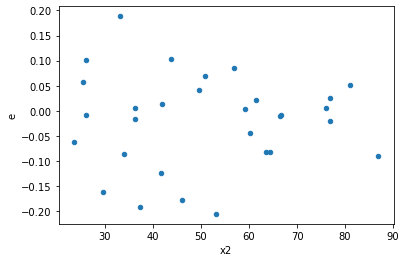

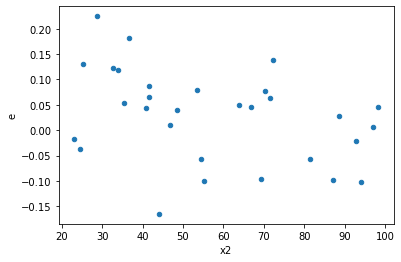

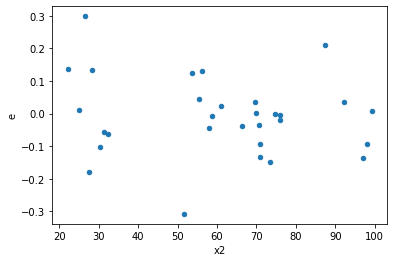

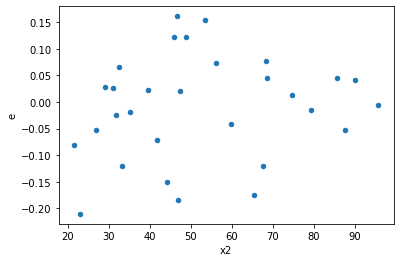

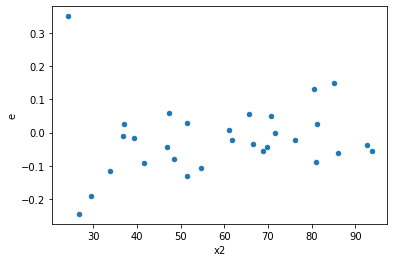

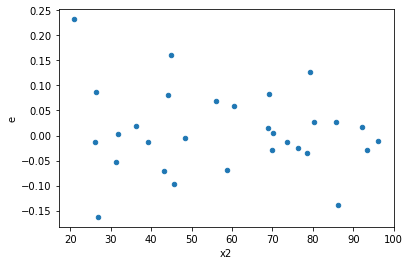

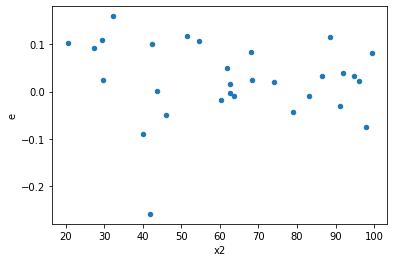

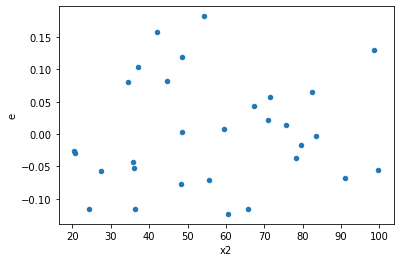

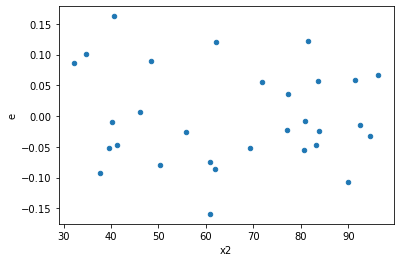

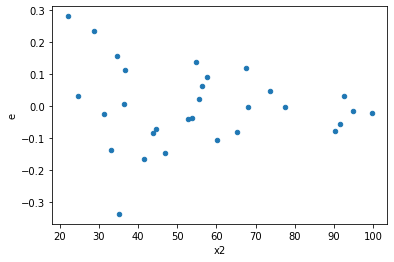

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,13.0,0.059884865727850844,0.1521961605374402,0.006653873969761205,0.011707396964418477,1.7594858300026734,0.3433289160860147,0.8283355419569927,0.17166445804300734,Reject005=1 : Homoscedasticity
2.0,16.0,6.0,0.1342542368555823,0.13725589893807366,0.008390889803473894,0.02287598315634561,2.7262881162942665,0.22126666132994033,0.8893666693350298,0.11063333066497016,Reject005=1 : Homoscedasticity
4.0,12.0,10.0,0.07248518393627292,0.2277416261294553,0.00604043199468941,0.02277416261294553,3.7702870643967157,0.04365147477628373,0.9781742626118581,0.021825737388141864,Reject005=0 : Heteroscedasticity
5.0,13.0,9.0,0.06239784201886895,0.07565002695512651,0.004799834001451458,0.008405558550569613,1.751218593815493,0.40346590935492954,0.7982670453225352,0.20173295467746477,Reject005=1 : Homoscedasticity
6.0,16.0,6.0,0.04403380987266454,0.07066973954014999,0.0027521131170415336,0.011778289923358332,4.279725949644017,0.08160587907706729,0.9591970604614664,0.040802939538533645,Reject005=1 : Homoscedasticity
9.0,7.0,15.0,0.017280225454858557,0.3890970394408944,0.0024686036364083654,0.02593980262939296,10.507884800466972,0.00017107856177545067,0.9999144607191123,8.553928088772533e-05,Reject005=0 : Heteroscedasticity
14.0,9.0,13.0,0.03115977776407529,0.30718363462775433,0.0034621975293416987,0.0236295103559811,6.825003529037239,0.0022339634176706813,0.9988830182911647,0.0011169817088353406,Reject005=0 : Heteroscedasticity
16.0,15.0,7.0,0.05887271631663251,0.03930088552132795,0.003924847754442167,0.0056144122173325635,1.43047898124918,0.6541907767907293,0.6729046116046353,0.3270953883953647,Reject005=1 : Homoscedasticity
20.0,8.0,14.0,0.06080065936217068,0.13546880590537377,0.007600082420271335,0.009676343278955269,1.273189255572548,0.6615286701456209,0.6692356649271896,0.33076433507281044,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,13.0,0.059884865727850844,0.1521961605374402,0.006653873969761205,0.011707396964418477,1.7594858300026734,0.3433289160860147,Reject005=1 : Homoscedasticity
1.0,13.0,9.0,0.09182084642411951,0.03217956205049907,0.007063142032624578,0.003575506894499897,0.506220443817308,0.25651202070478135,Reject005=1 : Homoscedasticity
2.0,16.0,6.0,0.1342542368555823,0.13725589893807366,0.008390889803473894,0.02287598315634561,2.7262881162942665,0.22126666132994033,Reject005=1 : Homoscedasticity
3.0,7.0,15.0,0.07678822707011734,0.15263184735614937,0.010969746724302478,0.010175456490409959,0.9275926551583145,0.9733946306084041,Reject005=1 : Homoscedasticity
4.0,12.0,10.0,0.07248518393627292,0.2277416261294553,0.00604043199468941,0.02277416261294553,3.7702870643967157,0.04365147477628373,Reject005=0 : Heteroscedasticity
5.0,13.0,9.0,0.06239784201886895,0.07565002695512651,0.004799834001451458,0.008405558550569613,1.751218593815493,0.40346590935492954,Reject005=1 : Homoscedasticity
6.0,16.0,6.0,0.04403380987266454,0.07066973954014999,0.0027521131170415336,0.011778289923358332,4.279725949644017,0.08160587907706729,Reject005=1 : Homoscedasticity
7.0,11.0,11.0,0.10307732457182502,0.05354976011071091,0.00937066587016591,0.004868160010064628,0.5195105745434541,0.2925417779856115,Reject005=1 : Homoscedasticity
8.0,15.0,7.0,0.0978132783099735,0.02483023857537542,0.006520885220664899,0.0035471769393393454,0.5439716877853064,0.3050723771489611,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      808
Reject005=0 : Heteroscedasticity    192
Name: Result_test, dtype: int64